In [1]:
# Import libraries

%matplotlib inline

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1337)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import ModelCheckpoint

import os
import random
import pickle

print "using ordering:", K.image_dim_ordering()


Using Theano backend.


using ordering: th


In [2]:
# Import image folder as X features dataset

import pickle

pickle_file = '-boxes'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    X = save['X']
    y = save['y']
    del save

imageFolder = "-boxes"

folders = os.listdir(imageFolder)
num_categories = len(folders)
folders.remove('.DS_Store')
folders.remove('0')
print folders

IOError: [Errno 21] Is a directory: '-boxes'

In [23]:
# Generate X dataset of formatted images

image_dim = 1 
image_size = 64

data = []

for folder in folders:
    

    fileNames = os.listdir("/".join([imageFolder, folder]))
    

    for fileName in fileNames[:50]:
        

        img = misc.imread("/".join([imageFolder, folder, fileName]))
        
        if image_dim == 1 and len(img.shape) > 2: 
            img = img[:,:,0] 

        if img.shape[0] != image_size or img.shape[1] != image_size:
            img = misc.imresize(img, (image_size, image_size), interp='nearest')
            
        img = (img - img.mean()) / img.std() / 4 + 0.5
        
        data.append([img, folder])

print "Load data complete"

Load data complete


In [25]:
# random dataset

random.shuffle(data)


image dimensions: (64, 64)


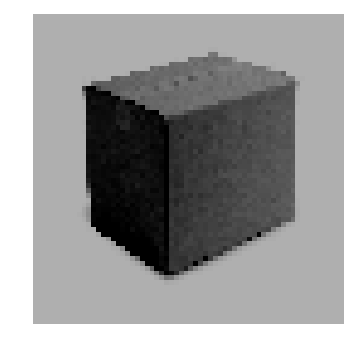

In [26]:
# Check
# Visualize image from X feature dataset and print corresponding text from Y target dataset

img_index = 2

img = X[img_index]
print "image dimensions:", img.shape


imshow(img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')
plt.axis('off')
plt.show()

In [ ]:
# Import text folder as Y target dataset


# Correspond each Y text file with X image






In [ ]:
# Split dataset into training and testing by 7:3

trainingSplit = int(.7 * X.shape[0])

X_train = X[:trainingSplit]
y_train = y[:trainingSplit]
X_test = X[trainingSplit:]
y_test = y[trainingSplit:]


In [ ]:
# Use pickle file to save dataset

pickle_file = imageFolder + '.pickle'

try:
    f = open(pickle_file, 'wb')
    save = {
        'X_train': X_train,
        'y_train': y_train,
        'X_test': X_test,
        'y_test': y_test,
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print 'Unable to save data to', pickle_file, ':', e
    raise
    
statinfo = os.stat(pickle_file)
print 'Saved data to', pickle_file
print 'Compressed pickle size:', statinfo.st_size